In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread


###  신경망
#### 퍼셉트론에서 신경망으로

#### 입력층 - 은닉층 - 출력층

![](img/006.jpg) 
![](img/007.jpg) 퍼셉트론에 평향을 명시할 수 있다 <br>
![](img/008.jpg) 보다 간결한 형태로 작성 가능 

### 활성화 함수의 등장 : Activation Function --> h
#### 기존의 퍼셉티콘과 신경망의 차이는 "활성화 함수"!!

![](img/009.jpg)
기존의 수식을 입력 받아 임계값을 판단하여 출력함

### Sigmoid function

![](img/010.jpg)

In [2]:
# 계단 함수 구현하기
def step_function(x):
    if x > 0:
        return 1
    else : 
        return 0
# 단순하지만 실수만 받기 때문에 배열을 넣을 수 없다...

In [3]:
# 넘파이 배열도 지원 가능한 function
def step_function(x):
    y = x > 0
    return y.astype(np.int)
# 넘파이를 활용한 간단한 트릭!

In [4]:
x = np.array([-3,-1,0,0.1, 1,2,4])
y = x >0 
y # x 값을 판별하여 T/F로 반환
y.astype(np.int) # 정수로 반환 1,0
y1 = y.astype(np.int)

array([False, False, False,  True,  True,  True,  True])

array([0, 0, 0, 1, 1, 1, 1])

(-0.1, 1.1)

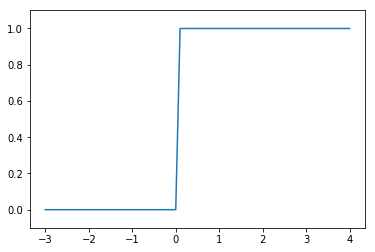

In [5]:
#계단함수 그래프 
plt.plot(x,y1)
plt.ylim(-0.1, 1.1)
plt.rcParams["figure.figsize"] = (4,2)
plt.show()

### 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
#테스트
x = np.arange(-10,10,0.1)

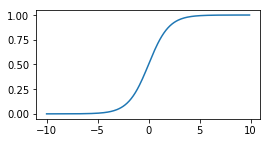

In [8]:
plt.plot(x,sigmoid(x))
plt.show()

sigmoid 의 매끔함이 신경망에서는 중요한 역할을 한다. <br>
리턴 값이 연속적인 실수의 형태를 가질 수 있다 <br>
비선형 함수이다 (!!)  선형 함수는 신경망을 깊게 하는 의미가 없음 --> 아무리 중첩해도 선형형태 유지<br>

### ReLU 함수
#### 아주 간단하지만 효과적!

![](img/011.jpg)

In [9]:
#ReLU 함수 구현
def relu(x):
    return np.maximum(0,x)
# 두 입력중 큰 것을 선택하여 반환하는 함수

### 다차원 배열의 계산

#### 다차원 배열을 통해 신경망을 효율적으로 구현 할 수 있다

In [10]:
A = np.array([1,2,3,4])
A
np.ndim(A) # dimantion
A.shape # 형상 --> 튜플 반환
A.shape[0]

array([1, 2, 3, 4])

1

(4,)

4

In [11]:
B = np.array([[1,2],[3,4],[5,6]])
B
np.ndim(B)
B.shape

array([[1, 2],
       [3, 4],
       [5, 6]])

2

(3, 2)

행렬 곱
![](img/012.jpg)

In [12]:
#행렬곱 계산하기
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B) # 행렬곱 함수 , 변수 순서에 주의하자!

array([[19, 22],
       [43, 50]])

신경망에서의 행렬곱
![](img/013.jpg)

In [13]:
X = np.array([1,2])
W = np.array([[1,2,3],[2,4,6]])
Y = np.dot(X,W)
print(X.shape," * ",W.shape,' = ',Y.shape)
Y

(2,)  *  (2, 3)  =  (3,)


array([ 5, 10, 15])

### 신경망 표기 
![](img/014.jpg)


### 신호전달 
![](img/015.jpg)

In [14]:
#최초입력값 & W,B 세팅
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1, 0.2, 0.3])

X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [15]:
# 1층으로 신호 전달
A1 = np.dot(X,W1)+B1
A1

array([0.3, 0.7, 1.1])

### 활성함수 적용
![](img/016.jpg)

In [16]:
#1층에서 활성함수 적용 값 출력
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [17]:
#2층 값 세팅 
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])
Z1.shape
W2.shape
B2.shape

(3,)

(3, 2)

(2,)

In [18]:
#2층 전달 수행 
A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [19]:
#최종 출력 
W3 = np.array([[0.1,0.3], [0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+ B3
A3

array([0.31682708, 0.69627909])

#### 출력층의 활성화 함수는 문제의 종류에 따라 정의됨 
* 회귀 --> 항등함수 
* 2클래스 분류 --> 시그모이드 
* 다중 클래스 --> Softmax

In [20]:
# 구현 정리 

# 네트워크 정의 (가중치 및 편향)
def init_network():
    network = {} #dict type
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['B3'] = np.array([0.1,0.2])
    
    return network

In [21]:
init_network()

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'B1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'B2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'B3': array([0.1, 0.2])}

In [22]:
# 전달 프로세스 정의
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = a3
    
    return y
    

In [23]:
# run!
network = init_network()
x = np.array([1,0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

#### 항등함수 , SoftMax

![](img/017.jpg)  ![](img/018.jpg)  ![](img/019.jpg)

In [24]:
#항등함수 : 회귀에 적용 
def identity_func(x):
    return x

# Soft max
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    
    return y

#### 지수함수는 큰 값을 돌려주기 때문에 큰 값끼리 나눗셈을 하면 불안정해 질수 있다.
#### softmax 함수 개선

In [25]:
# softmax 함수 계산시, 어떠한 정수를 더하거나 빼도 동일하다 
#예시
a = np.array([1010, 1000, 990])
softmax(a)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([nan, nan, nan])

In [26]:
c= np.max(a) #모든값에서 최대값을 뺀다
a1=a-c
softmax(a1)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [27]:
b=np.array([2000, 0, 2])
softmax(b)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([nan,  0.,  0.])

In [28]:
d = np.max(b)
b1=b-d
softmax(b1)

array([1., 0., 0.])

In [31]:
# 오버플로우를 예방하는 softmax
def softmax(x):
    c = np.max(x)
    x1 = x-c
    exp_x = np.exp(x1)
    sum_exp_x = np.sum(exp_x)
    
    y= exp_x / sum_exp_x
    
    return y
    

In [32]:
a = np.array([0.3,4,2,0.01,10])
softmax(a)
np.sum(softmax(a)) # 0과 1사이의 값을 출력 하며 sum == 1

array([6.11049857e-05, 2.47153196e-03, 3.34485477e-04, 4.57226346e-05,
       9.97087155e-01])

1.0

#### 소프트맥스 함수의 출력 결과는 확률로서 해석될 수 있다
#### 소프트맥스 함수는 단조함수로 대소관계를 바꾸지 않는다 --> 계산을 줄이기 위해 생략할 수 있음(추론단계에서)

![](img/020.jpg)

#### 학습과정 생략한 순전파 추론과정 MNIST 구현 
#### Forward Propagation

In [33]:
import sys,os
sys.path.append(os.pardir)
from mnist import load_mnist # mnist.py 에는 웹으로부터 데이터를 받아 numpy형태로 변환해주는 기능이 있다.

In [34]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=1, normalize =0)
# normalize : 이미지의 픽셀값을 0~1로 정규화 할지 결정 , 정규화 안했을 경우는 0~225
# flatten : 입력 이미지 평탄화 여부 결정 1*28*28 --> 784
# one_hot_label : 라벨을 one-hot으로 변경 여부 설정 '7' --> [0,0,0,0,0,0,1,0,0,0]

In [35]:
x_train.shape
t_train.shape
x_test.shape
t_test.shape

(60000, 784)

(60000,)

(10000, 784)

(10000,)

In [36]:
from PIL import Image #Image output

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img0 = x_train[0].reshape(28,28)
label0 = t_train[0]
label0
img_show(img0)

5

In [37]:
import pickle as pk

network = pk.load(open("sample_weight.pkl", 'rb') ) #미리 생성해놓은 W,B 값 입력
network['b2']

array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306, -0.03

In [38]:
#뉴럴 네트워크 정의
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    return y

In [39]:
accuracy_cnt = 0

for i in range(len(x_train)):
    y = predict(network,x_train[i])
    p = np.argmax(y) #가장 큰 값을 리턴
    if p == t_train[i]:  #라벨과 예측이 동일할때
        accuracy_cnt += 1

In [40]:
accuracy_cnt
accuracy_cnt/len(x_train) #정확도 출력

55511

0.9251833333333334

In [41]:
#가중치 형상 출력 
x_train.shape
x_train[0].shape
network['W1'].shape
network['W2'].shape
network['W3'].shape

(60000, 784)

(784,)

(784, 50)

(50, 100)

(100, 10)

![](img/021.jpg)

#### 배치 만들기 

In [42]:
batch_size = 100 # 100개씩 나누어 분류기 통과
acc = 0

for i in range(0,len(x_train),batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis =1) #분류 결과가 담긴 배열 생성
    acc+=np.sum(p==t_train[i:i+batch_size]) #배열을 bool타입으로 변경
    
acc/len(x_train)

0.9251833333333334